In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sn

In [3]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [5]:
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
df.head(10)

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
5,male,NaN,0,0,8.4583,Q,Third,man,True,0
6,male,54.0,0,0,51.8625,S,First,man,True,0
7,male,2.0,3,1,21.0750,S,Third,child,False,0
8,female,27.0,0,2,11.1333,S,Third,woman,False,1
9,female,14.0,1,0,30.0708,C,Second,child,False,1


In [7]:
df.dropna()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
885,female,39.0,0,5,29.1250,Q,Third,woman,False,0
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [8]:
df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [9]:
import sklearn 

In [10]:
df.groupby ('survived').size()

survived
0    549
1    342
dtype: int64

In [11]:
x=pd.get_dummies('class')

In [12]:
from sklearn.preprocessing import LabelEncoder
  
    

In [13]:
Ls=LabelEncoder()


In [14]:
df['class']=Ls.fit_transform(df['class'])

In [15]:
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,2,man,False,0
1,female,38.0,1,0,71.2833,C,0,woman,False,1
2,female,26.0,0,0,7.9250,S,2,woman,True,1
3,female,35.0,1,0,53.1000,S,0,woman,False,1
4,male,35.0,0,0,8.0500,S,2,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,1,man,True,0
887,female,19.0,0,0,30.0000,S,0,woman,True,1
888,female,NaN,1,2,23.4500,S,2,woman,False,0
889,male,26.0,0,0,30.0000,C,0,man,True,1


In [16]:
import seaborn as sns

<Axes: xlabel='survived', ylabel='count'>

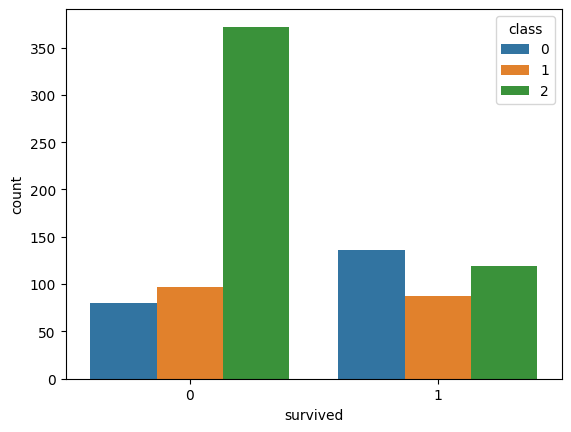

In [17]:
sns.countplot(x='survived',hue='class',data=df)

<Axes: xlabel='survived', ylabel='count'>

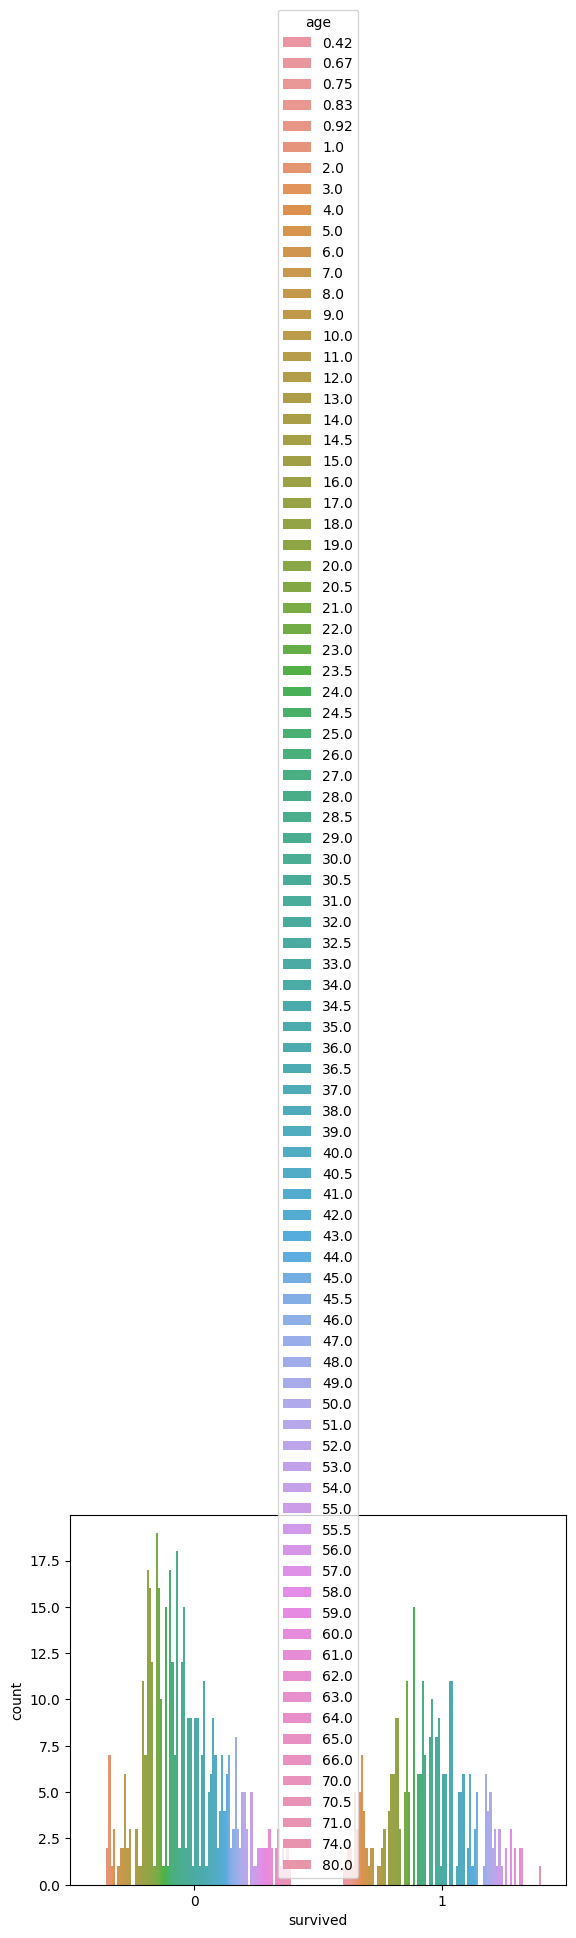

In [18]:
sns.countplot(x='survived',hue='age',data=df)

<Axes: xlabel='survived', ylabel='count'>

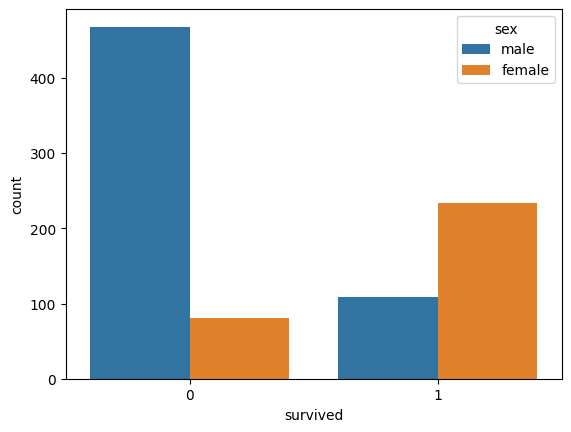

In [19]:
sns.countplot(x='survived',hue='sex',data=df)

<Axes: xlabel='survived', ylabel='count'>

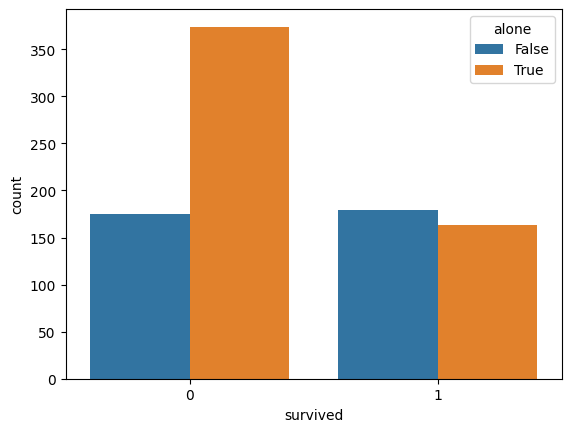

In [20]:
sns.countplot(x='survived',hue='alone',data=df)